In [ ]:
from DataLoader import HeartFailureDataset
import pandas as pd
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

load_data = HeartFailureDataset()
X = load_data.get_features()
y = load_data.get_targets()

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

First, we examine our dataset by considering the values of the dependent variable $y$. The target variable $y \in \{0,1\}$ is binary and takes on the following values:

<div style="text-align: center;">

$$
y = \begin{cases}
1 & \text{indicates a death event} \\
0 & \text{indicates survival}
\end{cases}
$$

</div>

We have $n = 300$ many data points and $d = 12$ different "features":

    1. Age; patient age, in years
    2. Anemia; decrease in red blood cells or hemoglobin,
    3. Creatinine; CPK enzyme levels in the blood (mcg/L),
    4. Diabetes; whether the patient is diabetic,
    5. Ejection fraction (EF); the percentage of blood that leaves the heart with each contraction
    6. High blood pressure; whether the patient has hypertension
    7. Platelets; platelets in the blood (kilo platelets/mL)
    8. Serum creatinine; serum creatinine level in the blood (mg/dL)
    9. Serum sodium; serum sodium level in the blood (mEq/L)
    10. Sex (gender); male or female
    11. Smoking; whether the patient smokes or not
    12. Time; Patient follow-up time in days
We store the Features in a $300 \times 12$ matrix $X$.

In [ ]:
y

     death_event
0              1
1              1
2              1
3              1
4              1
..           ...
294            0
295            0
296            0
297            0
298            0

[299 rows x 1 columns]


pandas.core.frame.DataFrame

In [ ]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np

z = zscore(X)
z_df = pd.DataFrame(z, columns=X.columns)
is_outlier = (np.abs(z_df) > 4).any(axis=1)
is_outlier
num_outliers = is_outlier.sum()
print(f"Anzahl der Ausreißer: {num_outliers}")

Anzahl der Ausreißer: 14


## TODO

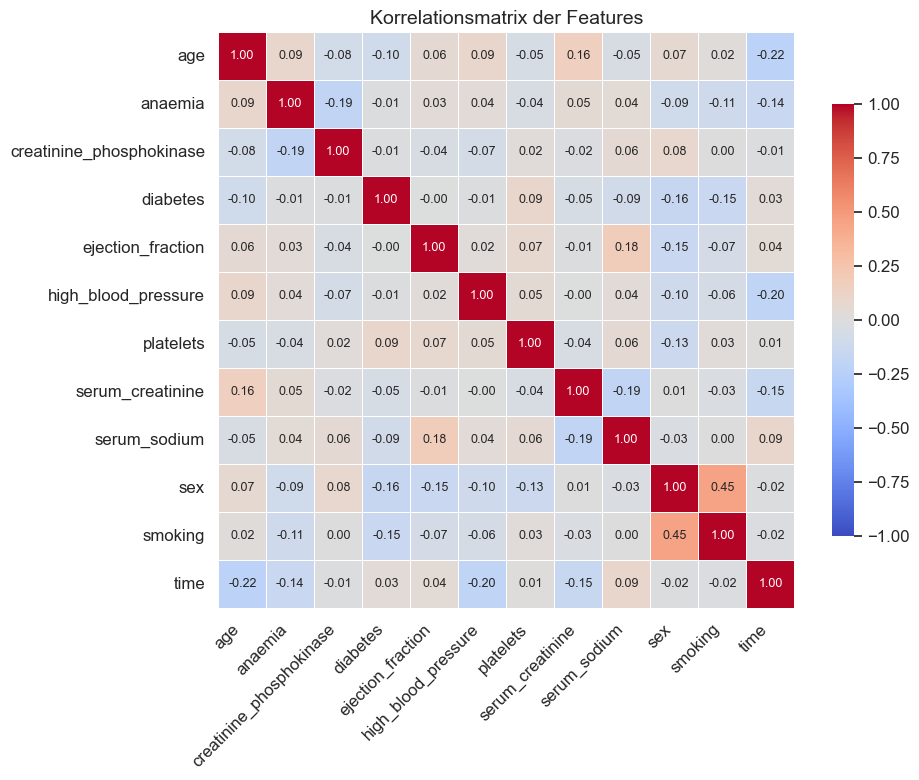

In [ ]:
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))  # Mehr Platz für 12 Features
sns.set(font_scale=1.1)  # Größere Schrift für bessere Lesbarkeit
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",  # zwei Nachkommastellen
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": 0.75},  # Farbleiste etwas kleiner
    linewidths=0.5,  # Gitterlinien zwischen Feldern
    annot_kws={"size": 9},  # Schriftgröße der Zahlen in den Feldern
)
plt.xticks(rotation=45, ha='right')  # Achsenbeschriftung lesbarer machen
plt.yticks(rotation=0)
plt.title("Korrelationsmatrix der Features", fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22968\2524838703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_series.values, y=correlations_series.index, palette="coolwarm")


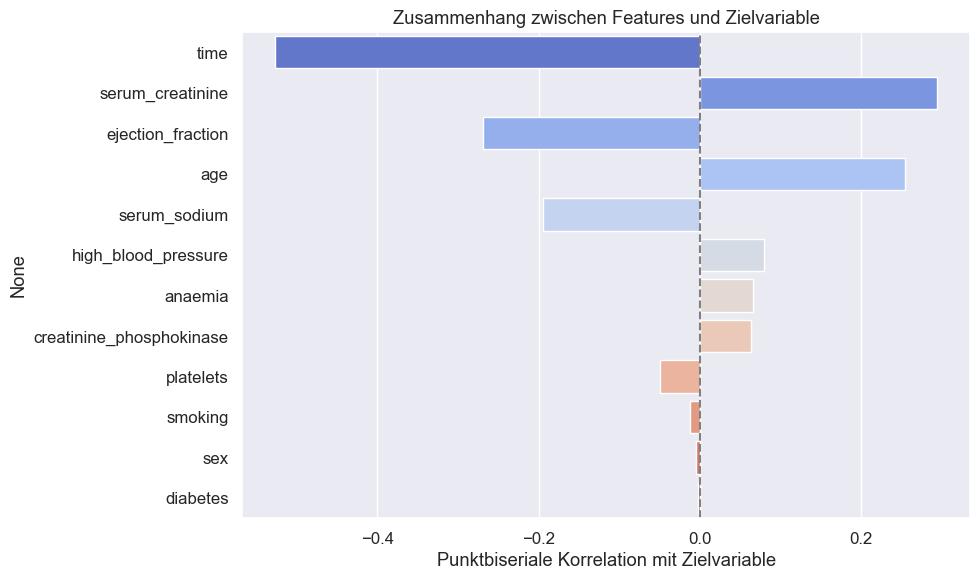

In [25]:
correlations = X.corrwith(y)
from scipy.stats import pointbiserialr

correlations = {}
for col in X.columns:
    corr, _ = pointbiserialr(X[col], y)
    correlations[col] = corr
correlations_series = pd.Series(correlations).sort_values(key=lambda x: x.abs(), ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_series.values, y=correlations_series.index, palette="coolwarm")
plt.xlabel("Punktbiseriale Korrelation mit Zielvariable")
plt.title("Zusammenhang zwischen Features und Zielvariable")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

We can remove the feature "time".

Next we aim to scale our data. As a first step we take a look at the histograms to determine different range of values.

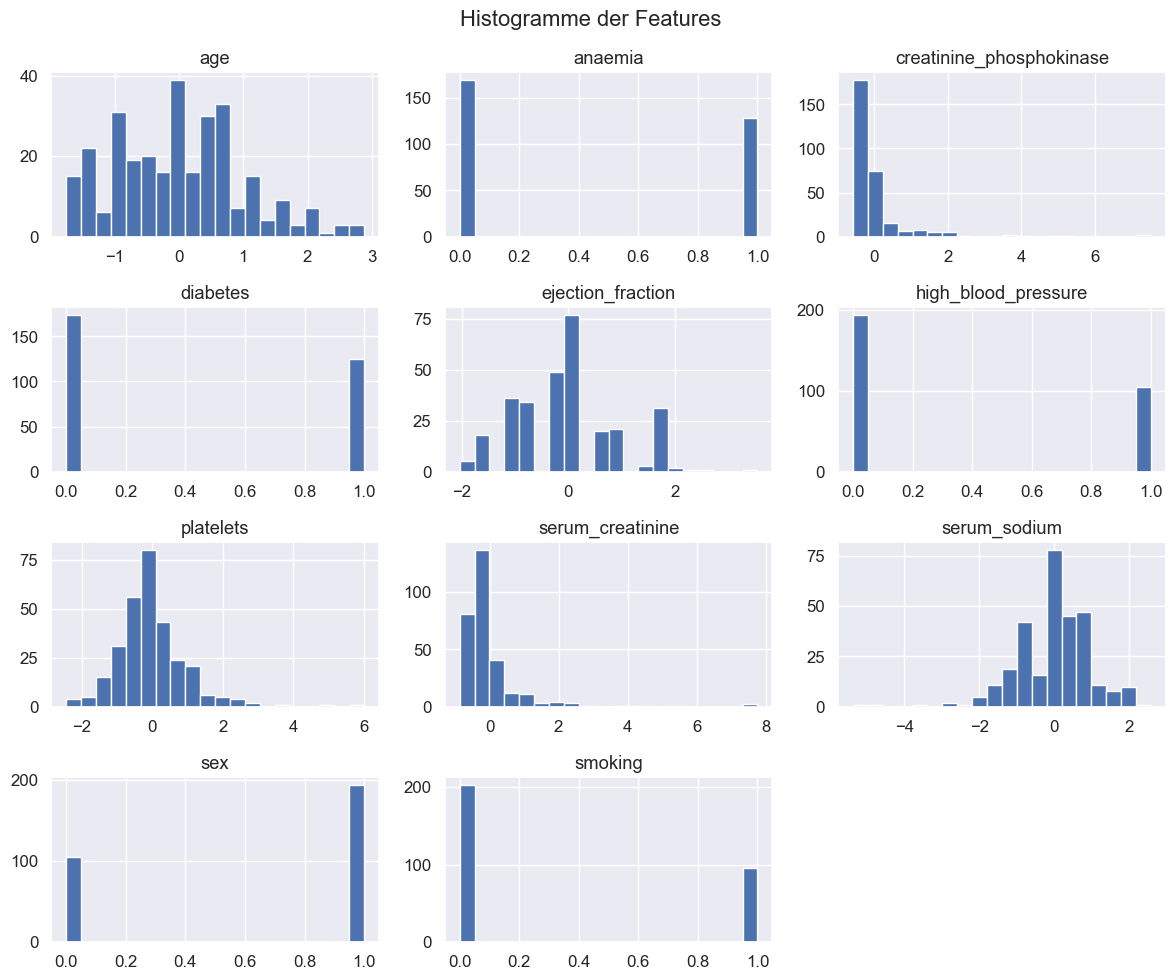

In [38]:
X = X.drop(columns=['time'])
X.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histogramme der Features")
plt.tight_layout()
plt.show()

Wir müssen unsere Daten also skalieren!
Um unsere Ergebnisse besser interpretieren zu können, skalieren wir alle nichtbinären feature mit dem Standscaler()

Die Standardisierung erfolgt für jedes numerische Feature $x$ nach folgender Formel:


$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$


- $ \mu $: Mittelwert des Features in den Trainingsdaten  
- $ \sigma $: Standardabweichung des Features in den Trainingsdaten

Für die binären Features wird keine Veränderung vorgenommen, sie bleiben unverändert.

In [39]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']
scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])